# Project: Classification of User Activity Preferences in BuddyMove Dataset

 Student Name: 

 
Student ID: 






### Task 1: Retrieving and Preparing the Data


1.1: **Import Libraries**

In [13]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1.2: **Load DataSet**

In [14]:
data = pd.read_csv('buddymove_holidayiq.csv')
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


1.3: **Checking the shape of DataSet**

In [15]:
data.shape

(249, 7)

In [16]:
data.columns

Index(['User Id', 'Sports', 'Religious', 'Nature', 'Theatre', 'Shopping',
       'Picnic'],
      dtype='object')

1.5: **Checking Missing Values**

In [17]:
print(data.isnull().sum())



User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64


1.6: **Normalize Numerical Values**


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data.drop('User Id', axis=1))

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])

# Add back the User Id column
data_scaled['User Id'] = data['User Id']
data_scaled.head()


,Sports,Religious,Nature,Theatre,Shopping,Picnic,User Id
0,-1.512592,-1.012048,-0.999351,-1.477403,-1.076163,-0.779962,User 1
1,-1.512592,-1.475170,-1.065216,-1.259117,-1.052055,-1.609003,User 2
2,-1.512592,-1.845668,-0.604160,-0.916097,-1.510114,-1.394067,User 3
3,-1.512592,-1.289922,-1.043261,-0.666628,-0.883296,-1.823940,User 4
4,-1.512592,-0.363678,-1.548227,-1.789239,-0.425237,-1.056309,User 5


1.7: **Create features and labels for classification**

In [19]:
# Define features and labels
features = data_scaled.drop('User Id', axis=1)  # Assuming 'User Id' is not used for classification
# For illustration, let's create a hypothetical label 'Activity Level' based on the sum of ratings
labels = (features.sum(axis=1) > features.sum(axis=1).median()).astype(int)  # Binary classification: high (1) vs. low (0) engagement

# Add the labels to the scaled data
data_scaled['Activity Level'] = labels



### Task 2: Data Exploration


2.1: **Descriptive Statistics and Visualizations for Each Column**


2.1.1: **SPORTS**

count    249.000000
mean      11.987952
std        6.616501
min        2.000000
25%        6.000000
50%       12.000000
75%       18.000000
max       25.000000
Name: Sports, dtype: float64


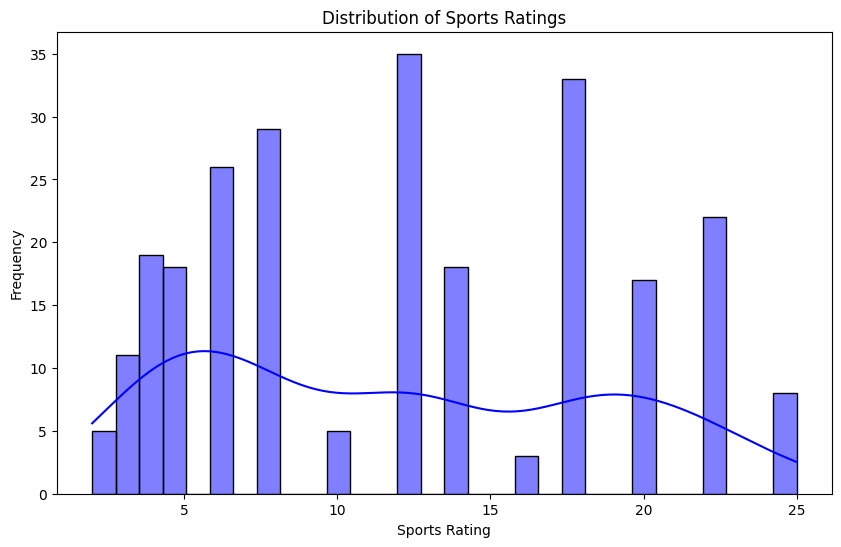

In [20]:
# Descriptive statistics
print(data['Sports'].describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Sports'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sports Ratings')
plt.xlabel('Sports Rating')
plt.ylabel('Frequency')
plt.show()


*This bar graph shows how users rated the 'Sports' category. Most people gave ratings around the middle range, which means they have different levels of interest in sports activities.*

2.1.2: **RELIGIOUS**

count    249.000000
mean     109.779116
std       32.454115
min       50.000000
25%       84.000000
50%      104.000000
75%      132.000000
max      203.000000
Name: Religious, dtype: float64


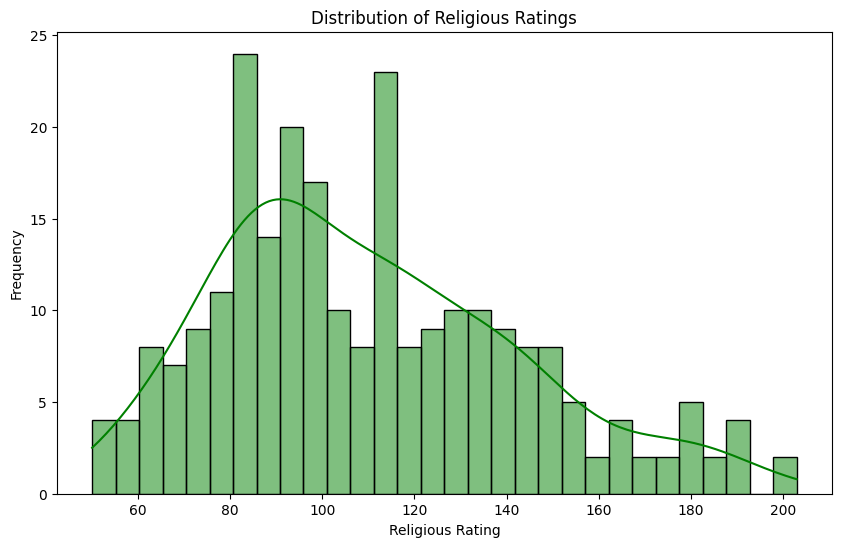

In [21]:
# Descriptive statistics
print(data['Religious'].describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Religious'], bins=30, kde=True, color='green')
plt.title('Distribution of Religious Ratings')
plt.xlabel('Religious Rating')
plt.ylabel('Frequency')
plt.show()


*It shows that most people give lower ratings for religious activities. This suggests that fewer people really enjoy or approve of religious activities compared to those who don't.*

2.1.3: **NATURE**

count    249.000000
mean     124.518072
std       45.639372
min       52.000000
25%       89.000000
50%      119.000000
75%      153.000000
max      318.000000
Name: Nature, dtype: float64


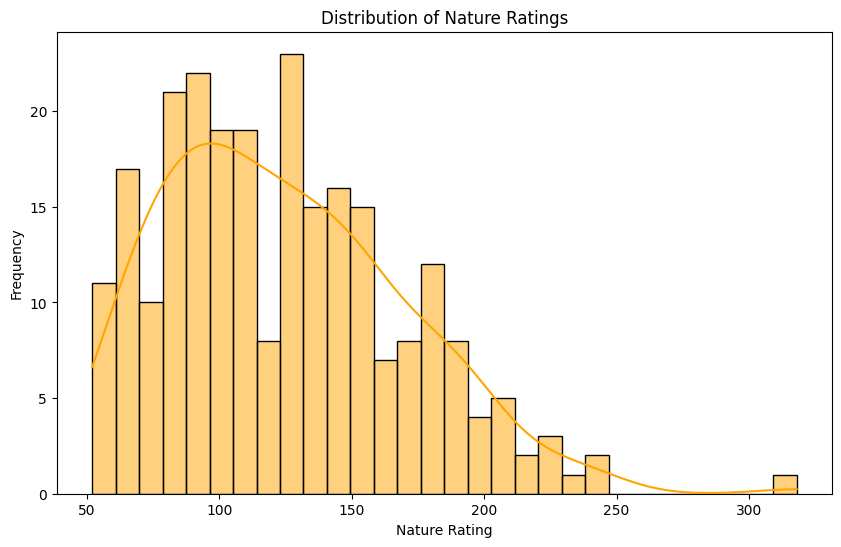

In [22]:
# Descriptive statistics
print(data['Nature'].describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Nature'], bins=30, kde=True, color='orange')
plt.title('Distribution of Nature Ratings')
plt.xlabel('Nature Rating')
plt.ylabel('Frequency')
plt.show()


*It shows people have similar opinions about nature, with fewer extreme ratings compared to sports or religious activities.*

2.1.4: **SHOPPING**

count    249.000000
mean     112.638554
std       41.562888
min       50.000000
25%       79.000000
50%      104.000000
75%      138.000000
max      233.000000
Name: Shopping, dtype: float64


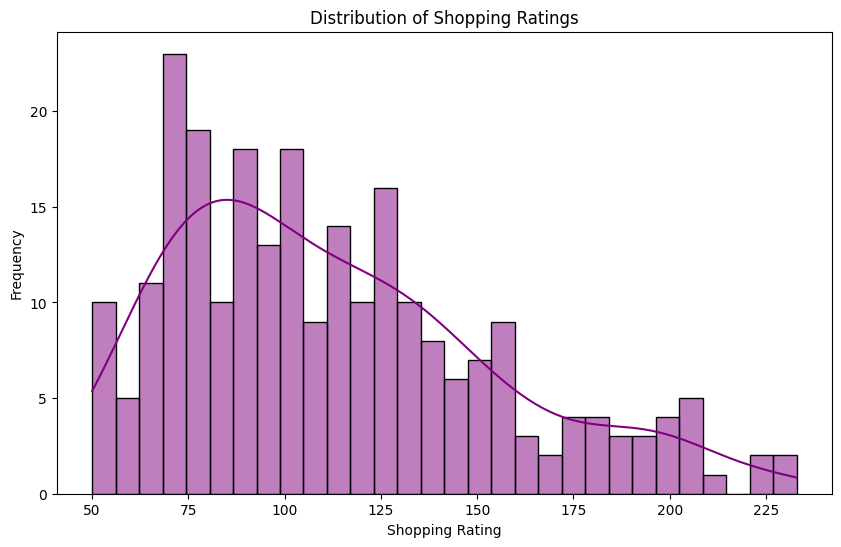

In [23]:
# Descriptive statistics
print(data['Shopping'].describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Shopping'], bins=30, kde=True, color='purple')
plt.title('Distribution of Shopping Ratings')
plt.xlabel('Shopping Rating')
plt.ylabel('Frequency')
plt.show()


*IT suggests that people's ratings for 'Shopping'  vary widely, with some giving low ratings and others giving high ratings, indicating mixed opinions about shopping experiences.*

2.1.5: **THEATRE**

count    249.000000
mean     116.377510
std       32.132696
min       59.000000
25%       93.000000
50%      113.000000
75%      138.000000
max      213.000000
Name: Theatre, dtype: float64


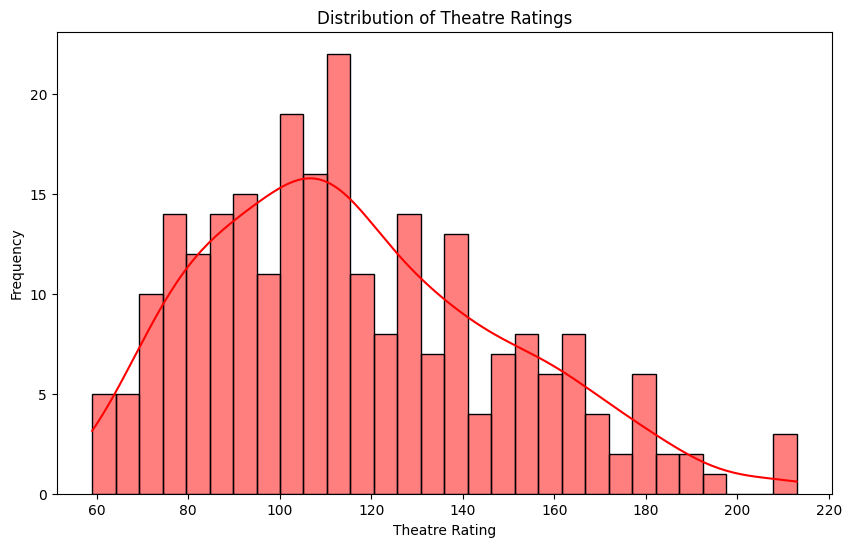

In [24]:
# Descriptive statistics
print(data['Theatre'].describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Theatre'], bins=30, kde=True, color='red')
plt.title('Distribution of Theatre Ratings')
plt.xlabel('Theatre Rating')
plt.ylabel('Frequency')
plt.show()


*It shoes the distribution of user ratings for the 'Theatre' category. There is a noticeable peak at the lower end, suggesting many users have low ratings for theatre activities.*

2.1.6: **PICNIC**

count    249.000000
mean     120.401606
std       32.633339
min       61.000000
25%       92.000000
50%      119.000000
75%      143.000000
max      218.000000
Name: Picnic, dtype: float64


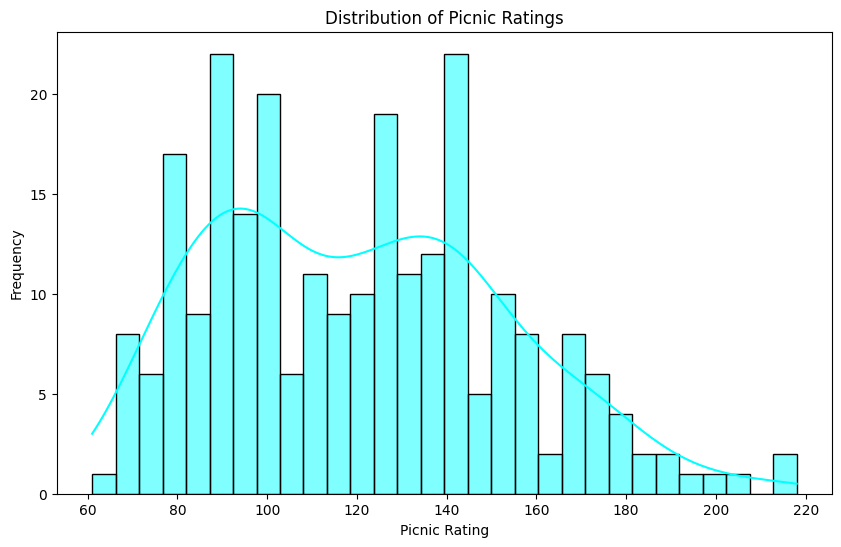

In [25]:
# Descriptive statistics
print(data['Picnic'].describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Picnic'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Picnic Ratings')
plt.xlabel('Picnic Rating')
plt.ylabel('Frequency')
plt.show()


*It shows people have similar opinions about Picnic, with fewer extreme ratings compared to sports or religious activities.*

2.2 **Explore Relationships Between Pairs of Attributes**


2.2.1.1: **SPORTS VS NATURE**

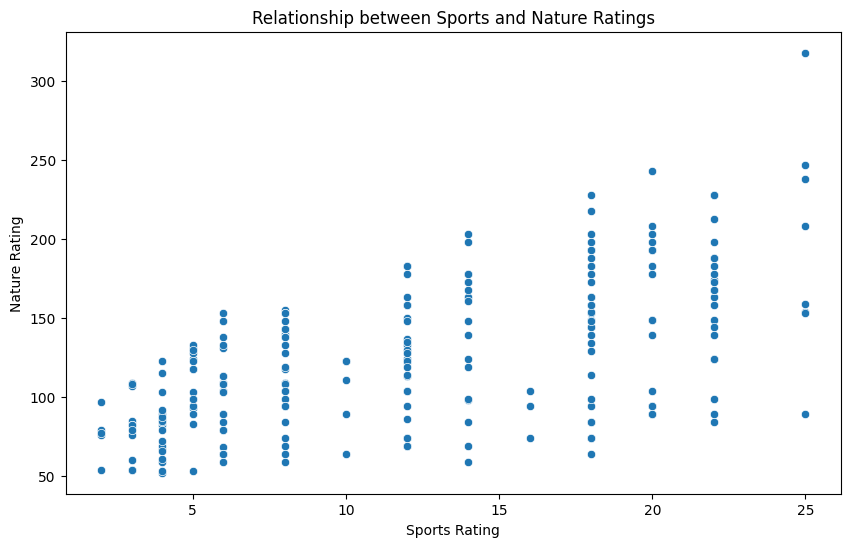

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sports', y='Nature', data=data)
plt.title('Relationship between Sports and Nature Ratings')
plt.xlabel('Sports Rating')
plt.ylabel('Nature Rating')
plt.show()


**Hypothesis:**  *Users who like sports might also enjoy nature-related activities

**Observation:**  *The scatter plot shows some positive correlation, suggesting users who like sports also likes nature activities more.*

2.2.1.2: **SPORTS VS THEATRE**

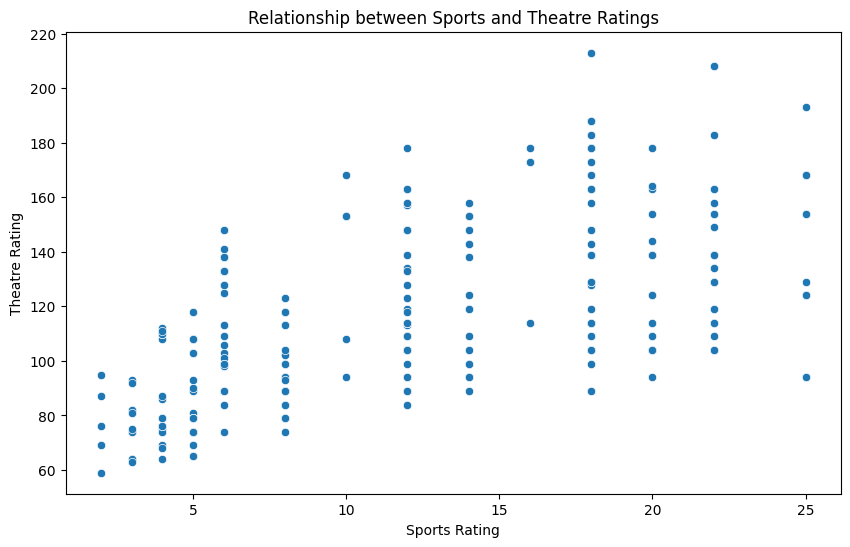

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sports', y='Theatre', data=data)
plt.title('Relationship between Sports and Theatre Ratings')
plt.xlabel('Sports Rating')
plt.ylabel('Theatre Rating')
plt.show()


**Hypothesis:**  *May be a weak correlation between sports and theatre ratings since these activities have different interests.*

**Observation:**  *The scatter plot shows weak correlation.*

2.2.1.3: **SPORTS VS SHOPPING**

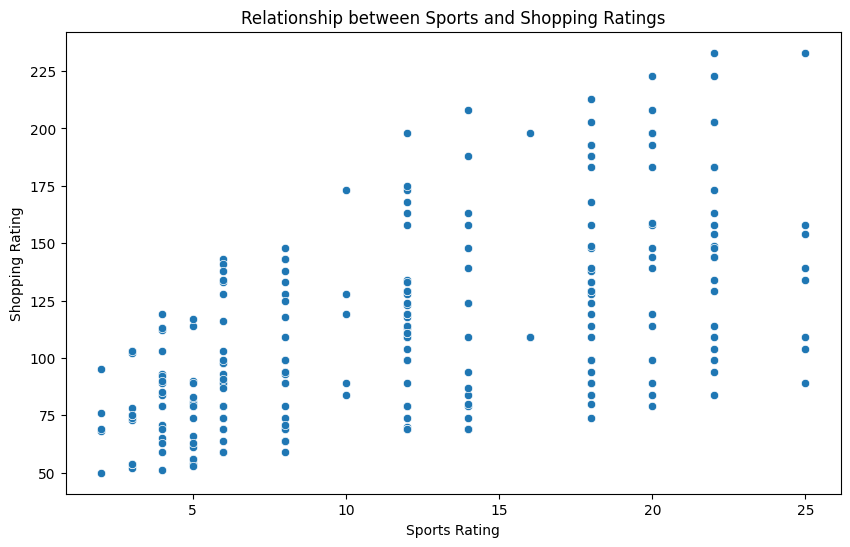

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sports', y='Shopping', data=data)
plt.title('Relationship between Sports and Shopping Ratings')
plt.xlabel('Sports Rating')
plt.ylabel('Shopping Rating')
plt.show()


**Hypothesis:**  *There could be a neutral or weak correlation between sports and shopping ratings as these activities cater to different interests.*

**Observation:**  *The scatter plot confirms a weak correlation.*

2.2.1.4: **SPORTS VS PICNIC**

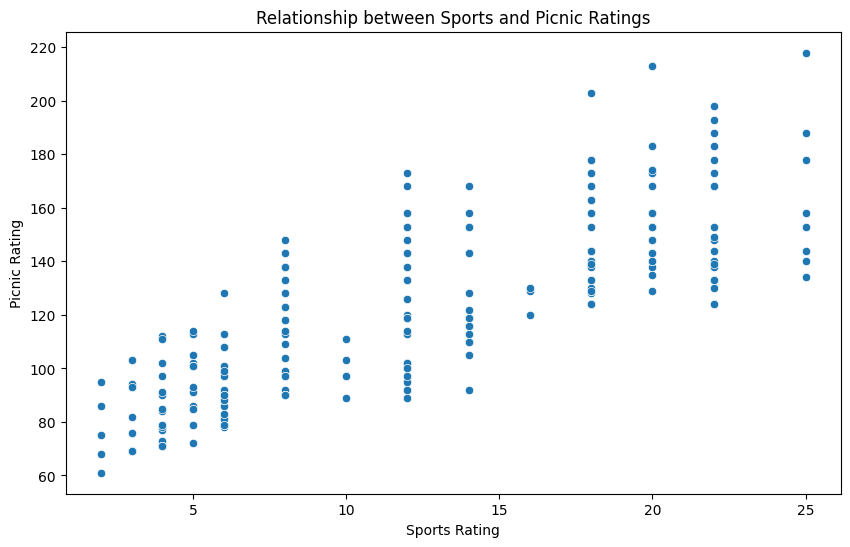

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sports', y='Picnic', data=data)
plt.title('Relationship between Sports and Picnic Ratings')
plt.xlabel('Sports Rating')
plt.ylabel('Picnic Rating')
plt.show()


**Hypothesis:**  *May be a storng correlation between sports and picnic ratings since these activities have apealing.*

**Observation:**  *The scatter plot shows a positive correlation, with users who rate sports highly also rates picnic activities more*

2.2.1.5: **SPORTS VS RELIGIOUS**

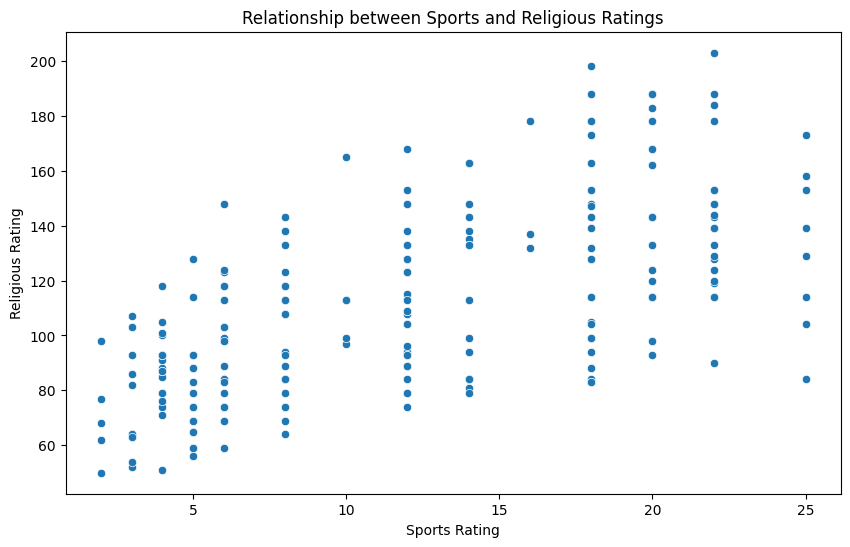

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sports', y='Religious', data=data)
plt.title('Relationship between Sports and Religious Ratings')
plt.xlabel('Sports Rating')
plt.ylabel('Religious Rating')
plt.show()


**Hypothesis:**  *There may be  weak correlation between sports and religious ratings as these activities are different in nature.*

**Observation:**  *The scatter plot confirms a weak correlation.*

2.2.2.1: **RELIGIOUS VS NATURE**

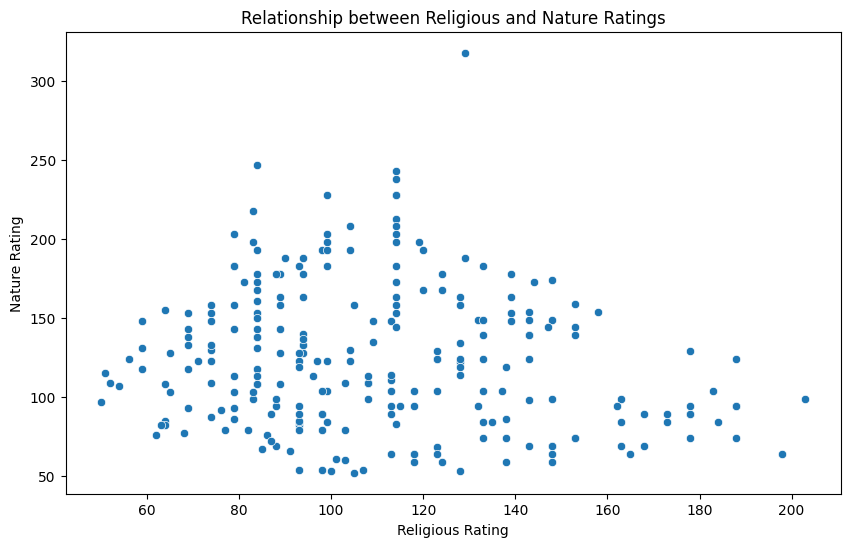

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Religious', y='Nature', data=data)
plt.title('Relationship between Religious and Nature Ratings')
plt.xlabel('Religious Rating')
plt.ylabel('Nature Rating')
plt.show()


**Hypothesis:**  *May be a weak or neutral correlation between religious and nature.*

**Observation:**  *The scatter plot shows a weak correlation, *

2.2.2.2: **RELIGIOUS VS THEATRE**

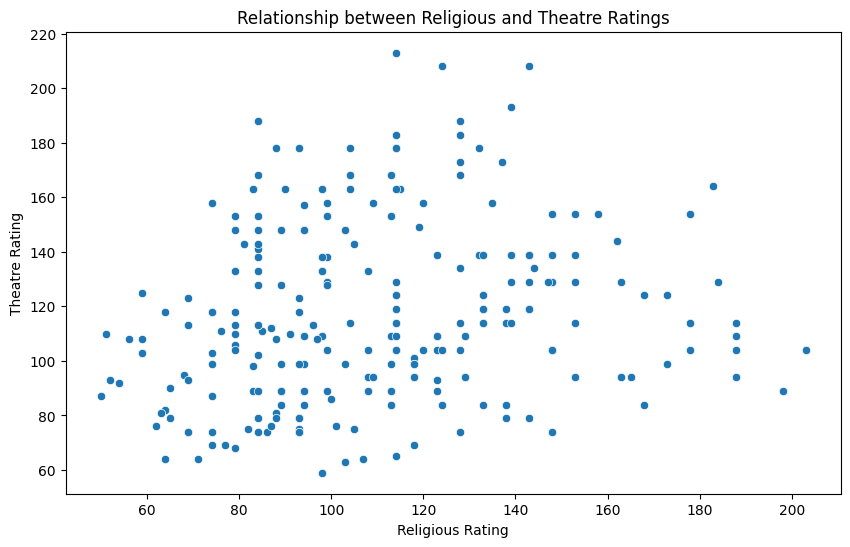

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Religious', y='Theatre', data=data)
plt.title('Relationship between Religious and Theatre Ratings')
plt.xlabel('Religious Rating')
plt.ylabel('Theatre Rating')
plt.show()


**Hypothesis:**  *Users who are interested in religious activities might not have a strong preference for theatre activities.*

**Observation:**  *The scatter plot confirms a weak correlation between religious and theatre ratings*

2.2.2.3: **RELIGIOUS VS SHOPPING**

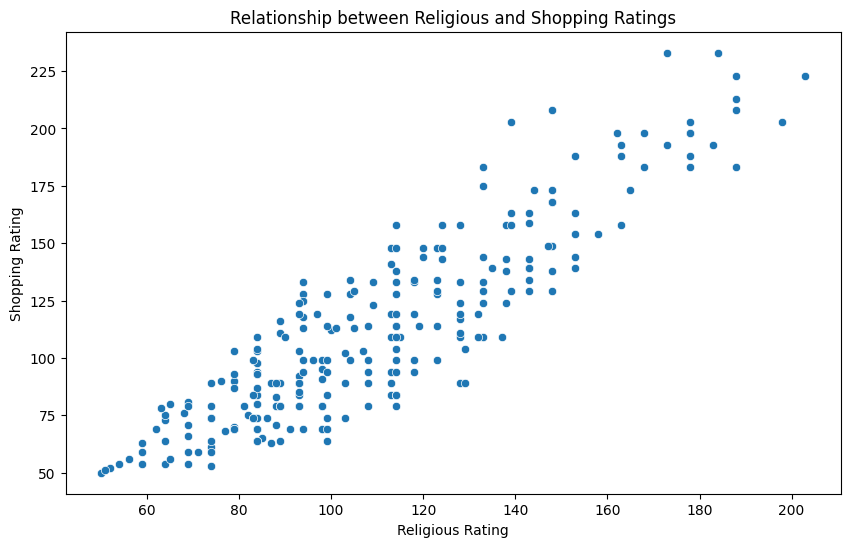

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Religious', y='Shopping', data=data)
plt.title('Relationship between Religious and Shopping Ratings')
plt.xlabel('Religious Rating')
plt.ylabel('Shopping Rating')
plt.show()


**Hypothesis:**  *There could be a weak or neutral correlation between religious and shopping ratings*

**Observation:**  *The scatter plot shows a weak correlation.*

2.2.2.4: **RELIGIOUS VS PICNIC**

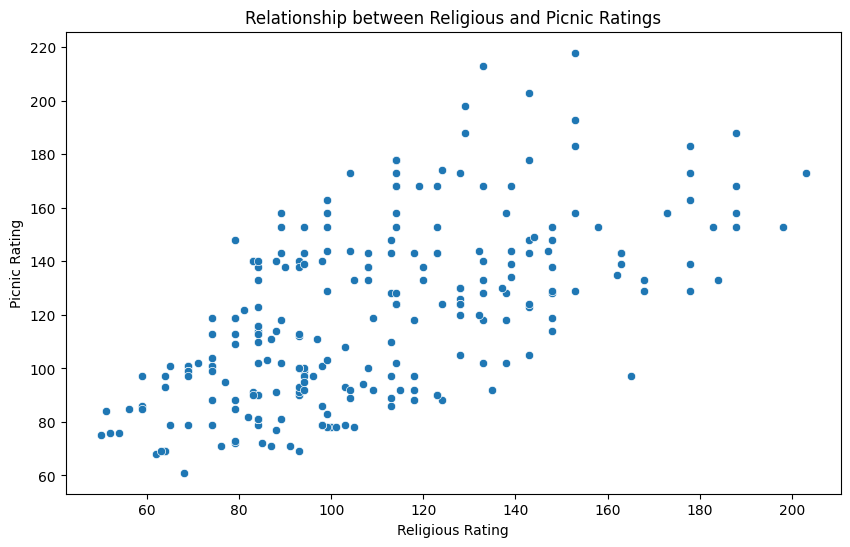

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Religious', y='Picnic', data=data)
plt.title('Relationship between Religious and Picnic Ratings')
plt.xlabel('Religious Rating')
plt.ylabel('Picnic Rating')
plt.show()


**Hypothesis:**  *There might be a weak correlation between religious and picnic ratings.
*

**Observation:**  *The scatter plot shows a weak correlation.*

2.2.2.4: **NATURE VS THEATRE**

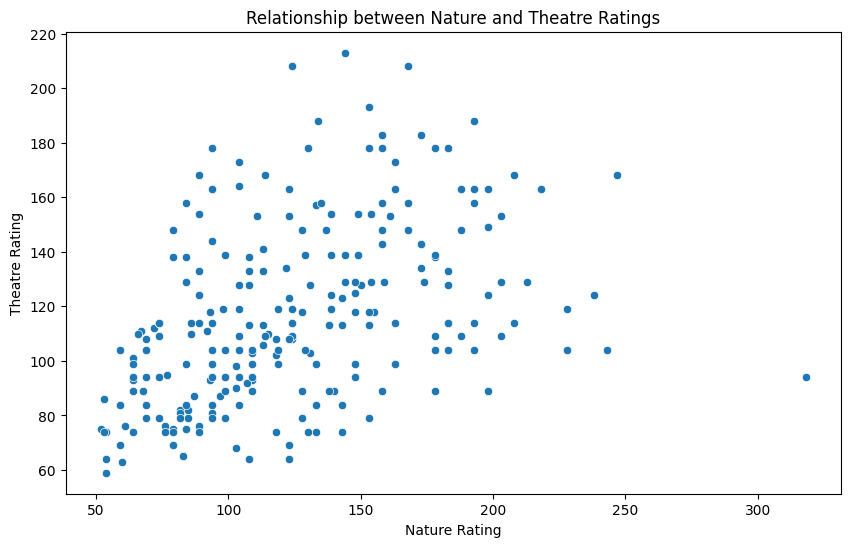

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nature', y='Theatre', data=data)
plt.title('Relationship between Nature and Theatre Ratings')
plt.xlabel('Nature Rating')
plt.ylabel('Theatre Rating')
plt.show()


**Hypothesis:**  *There might be a weak correlation between nature and theatre ratings.*


**Observation:**  *The scatter plot shows a weak correlation.*

### Task 3: Data Modelling

1.Decision Tree Classification Model


In [36]:
#Importing modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [37]:
X =data[['Religious','Nature', 'Theatre', 'Shopping', 'Picnic']]
y=data['Sports']

In [38]:
#Split a Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Train a model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [51]:
# Predict and evaluate
y_pred=model.predict(X_test)
dec_tree_accuracy=accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:",dec_tree_accuracy)
dec_tree_precision=precision_score(y_test, y_pred, average='weighted')
print('Precision Score:', dec_tree_precision)
dec_tree_recall=recall_score(y_test, y_pred, average='weighted')
print('Recall Score:', dec_tree_recall)         
dec_tree_f1=f1_score(y_test, y_pred, average='weighted')
print('F1 Score:',dec_tree_f1 )  
dec_tree_cm=confusion_matrix(y_test, y_pred)               
print("Confusion Matrix:", dec_tree_cm)

Decision Tree Accuracy: 0.48
Precision Score: 0.4151341991341992
Recall Score: 0.48
F1 Score: 0.4057272727272727
Confusion Matrix: [[0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 6 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 2 0]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

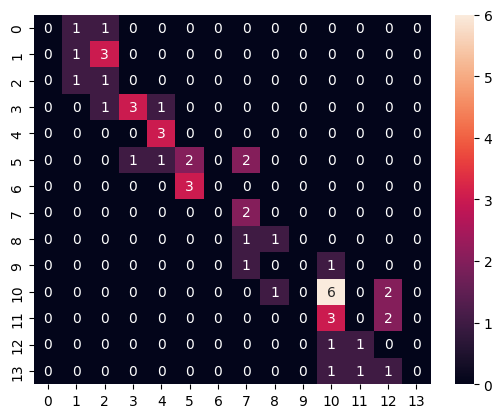

In [41]:
sns.heatmap(dec_tree_cm, annot=True)

2. Random Forest Classification Model

In [42]:
#import KNN Module
from sklearn.ensemble import RandomForestClassifier

# Train A model
model=RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

In [52]:
# Predict and evaluate
y_pred=model.predict(X_test)
ran_for_acc=accuracy_score(y_test, y_pred)
print("Accuracy:", ran_for_acc)
ran_for_precision=precision_score(y_test, y_pred, average='weighted')
print('Precision Score:',ran_for_precision)  
ran_for_recall=recall_score(y_test, y_pred, average='weighted')
print('Recall Score:',ran_for_recall )   
ran_for_f1=f1_score(y_test, y_pred, average='weighted')      
print('F1 Score:',ran_for_f1)  
ran_for_cm=confusion_matrix(y_test, y_pred)               
print("Confusion Matrix:", ran_for_cm)

Accuracy: 0.48
Precision Score: 0.4151341991341992
Recall Score: 0.48
F1 Score: 0.4057272727272727
Confusion Matrix: [[0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 6 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 2 0]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

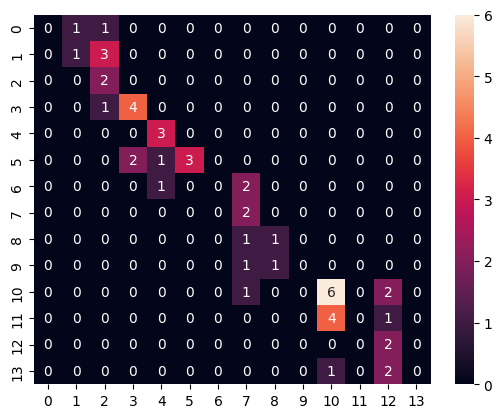

In [44]:
sns.heatmap(ran_for_cm, annot=True)

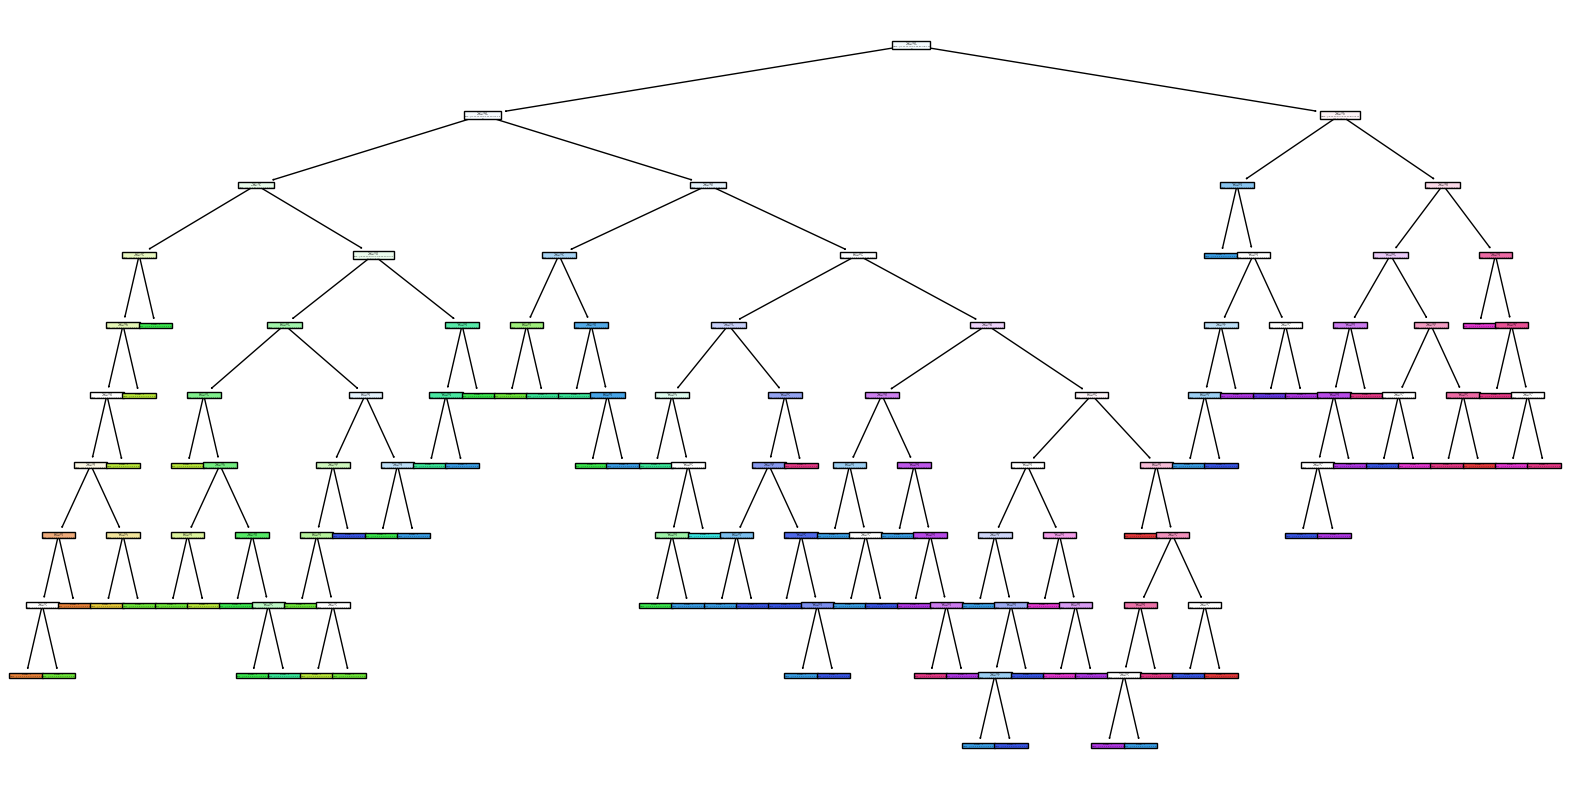

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree
single_tree = model.estimators_[0]
plt.figure(figsize=(20, 10))
tree.plot_tree(single_tree, filled=True)
plt.show()


### Compare Both Models ###

In [46]:
print("\n Accuracy Comparison:")
print("Decision Tree Accuracy:", dec_tree_accuracy)
print("Random Forest Accuracy:", ran_for_acc)
print("\n Precision Comparison:")
print("Decision Tree Precision:", dec_tree_precision)
print("Random Forest Precision:", ran_for_precision)
print("\n Confusion Matrix Comparison:")
print("Decision Tree Confusion Matrix:", dec_tree_cm)
print("Random forest Confusion Matrix:", ran_for_cm)



 Accuracy Comparison:
Decision Tree Accuracy: 0.38
Random Forest Accuracy: 0.48

 Precision Comparison:
Decision Tree Precision: 0.31566666666666665
Random Forest Precision: 0.4151341991341992

 Confusion Matrix Comparison:
Decision Tree Confusion Matrix: [[0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 3 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 6 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0]]
Random forest Confusion Matrix: [[0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 

**Observations**:

*Both models have about the same accuracy, but the Decision Tree seems a bit better at making precise predictions.* 

